# Advance House Price Prediction

## All the life cycle of Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('train.csv')
dataset.shape

(1460, 81)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Checking the missing values

In [5]:
#finding the percent of missing values in each features having missing values
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

for features in features_with_nan :
    mean_ = round(dataset[features].isnull().mean(), 4)  #round upto 4 decimal place.
    print(features, mean_, "% missing values")

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


#### So there are many missing values so we need to find out the relationship between features with missing values and target variable i.e sales price

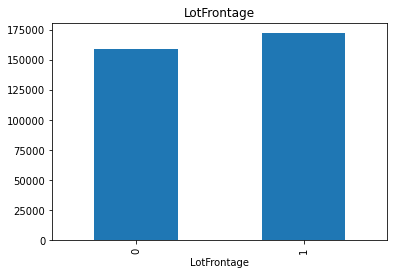

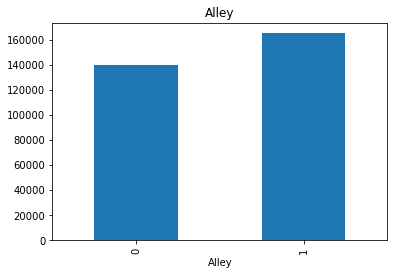

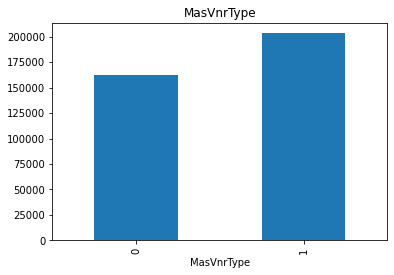

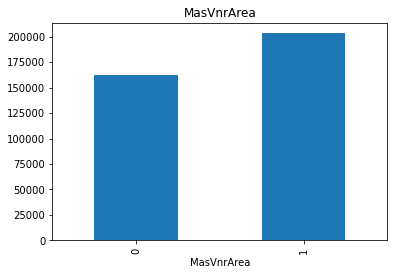

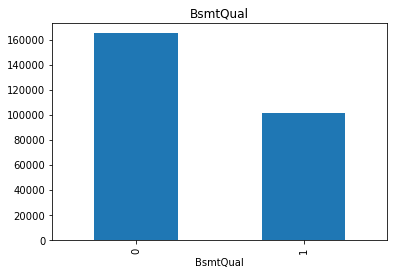

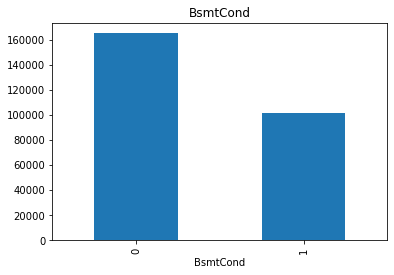

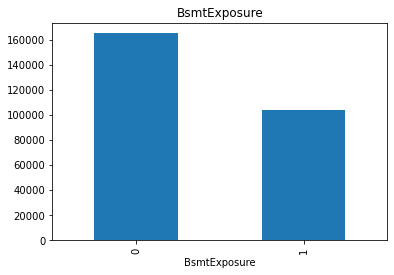

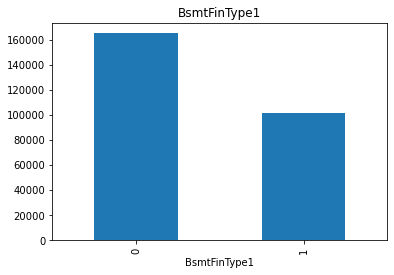

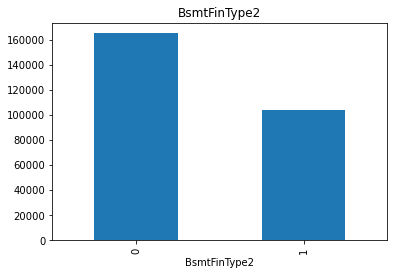

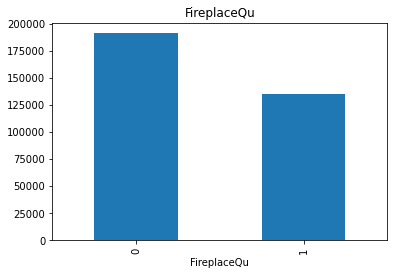

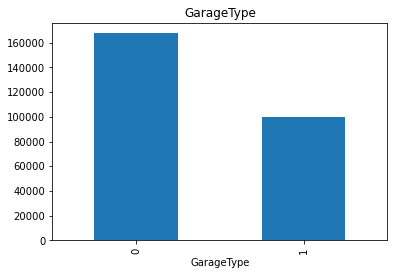

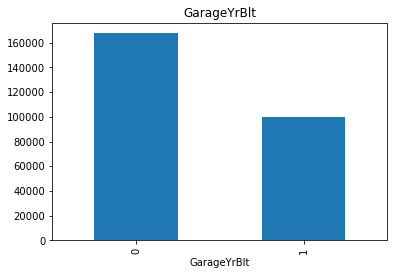

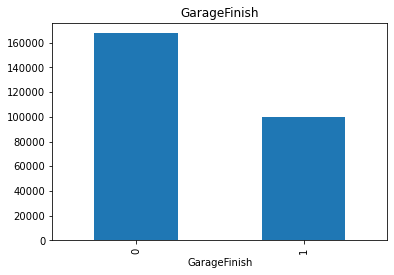

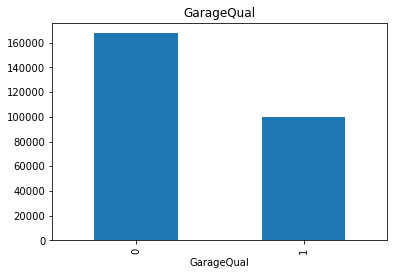

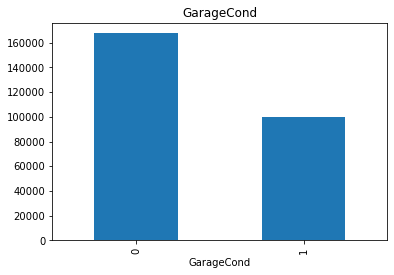

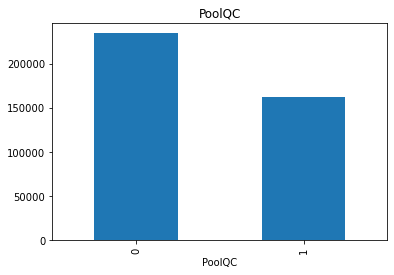

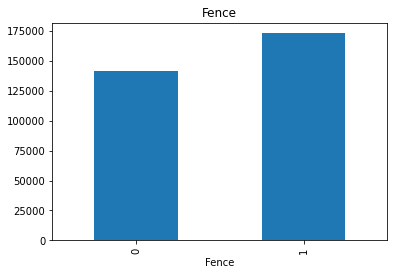

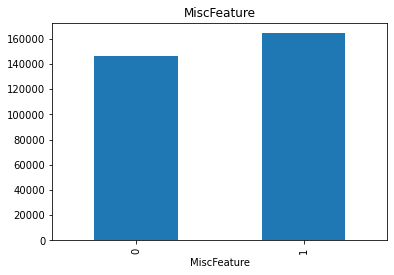

In [6]:
#plotting the graph for each features having missing values with respect to target feature.

for feature in features_with_nan :
    data = dataset.copy()
    
    #making a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    #grouping the dataset by feature having nan values and plotting it
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

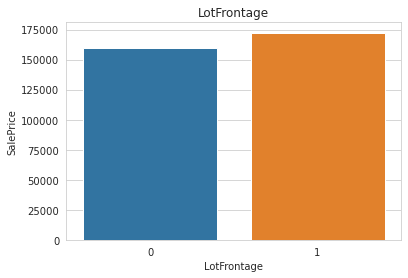

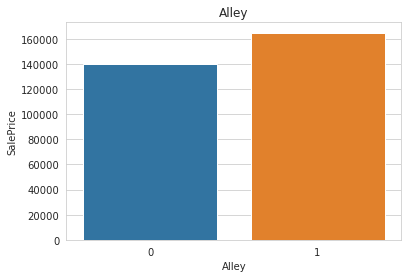

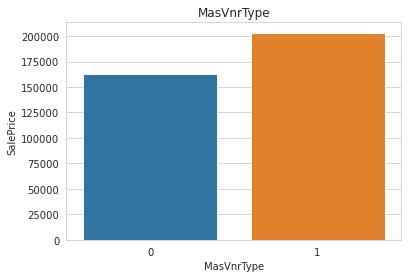

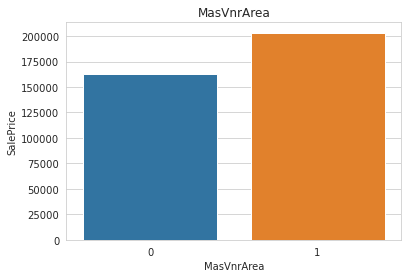

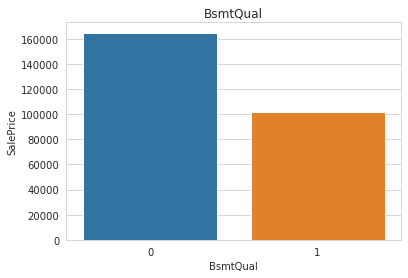

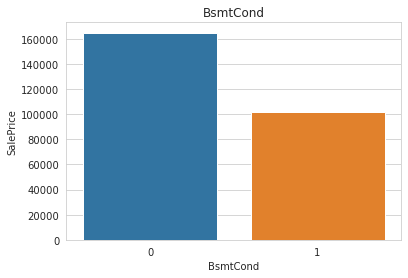

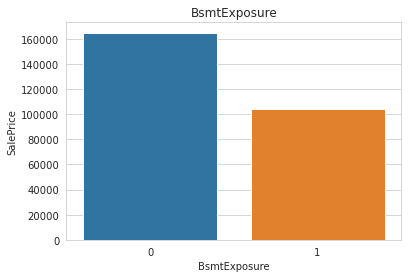

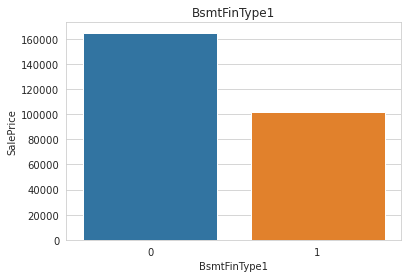

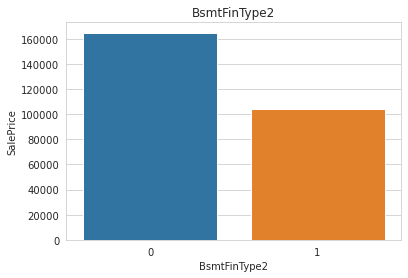

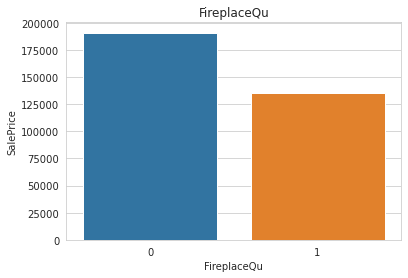

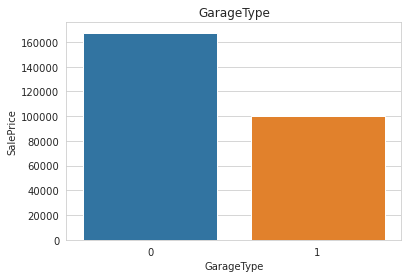

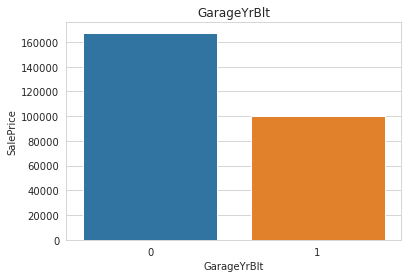

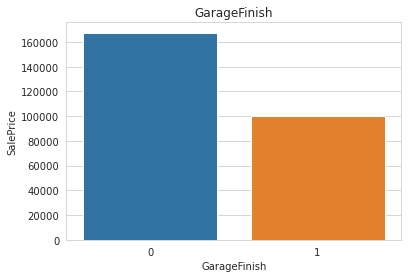

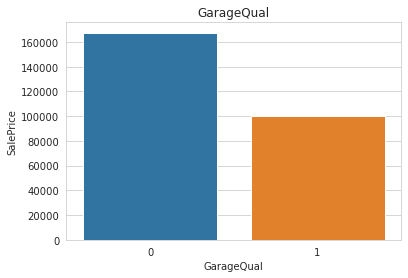

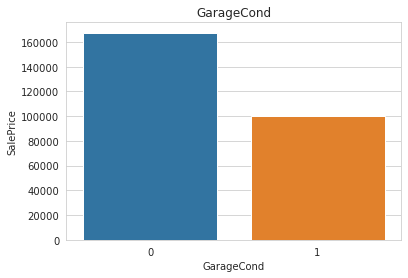

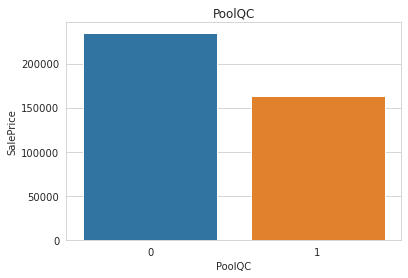

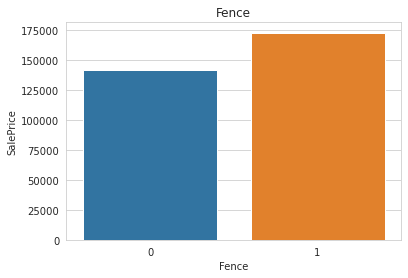

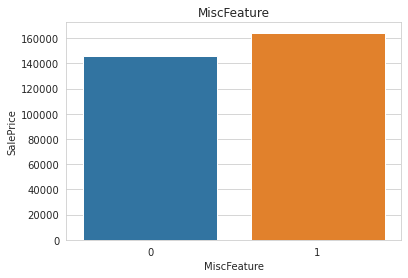

In [7]:
#or we can also plot the same using sns.barplot
for feature in features_with_nan :
    
    df = dataset.copy()
    df[feature] = np.where(df[feature].isnull(), 1, 0)
    
    sns.set_style('whitegrid')
    sns.barplot(x=feature, y='SalePrice', data=df, estimator=np.median, ci=False)
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section.

#### Creating the list for the features which contains numeric values but not categorical values.

In [8]:
#since the datatype of categorical features is object
numeric_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print(f'Total features having numeric values :- {len(numeric_feature)}')

Total features having numeric values :- 38


In [9]:
dataset[numeric_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering.

In [10]:
#creating a list for the temporal features
year_feature = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
print(f"Total number of temporal features :- {len(year_feature)}")

Total number of temporal features :- 4


In [11]:
dataset[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


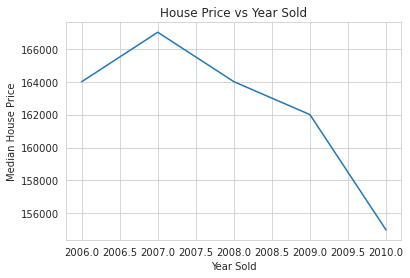

In [12]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.title('House Price vs Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.show()

#### Comparing the difference between all year features and the saleprice

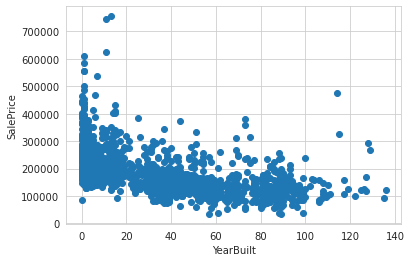

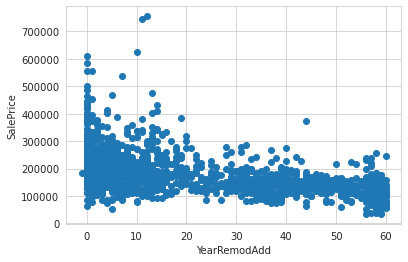

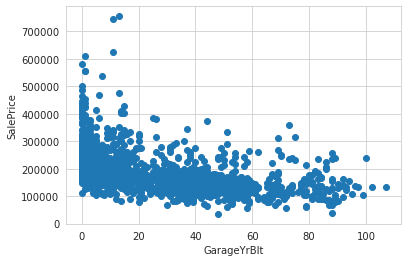

In [13]:
for feature in year_feature :
    
    if feature != 'YrSold' :
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]
        #capturing the difference between year variable and year the house was sold for
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Here we can clearly see, the older the house, the lower the price.

Price of new houses are greater.

YearRemodAdd means that the year in which the house has been modified.

So, If the year of modification of house is less, then the price is greater and if the year is more then the price is less

In [14]:
len(dataset['OverallQual'].unique())

10

#### Numerical variables are usually of 2 types ie., Continous variable and Discrete Variables.

#### Creating the list for the discreate numerical value

In [15]:
discrete_feature = [feature for feature in numeric_feature 
                    if len(dataset[feature].unique()) < 25 
                    and feature not in year_feature + ['Id']]

print(f'Total discrete feature :- {len(discrete_feature)}')

Total discrete feature :- 17


In [16]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


#### Visualizing the relationship between each discrete feature and saleprice

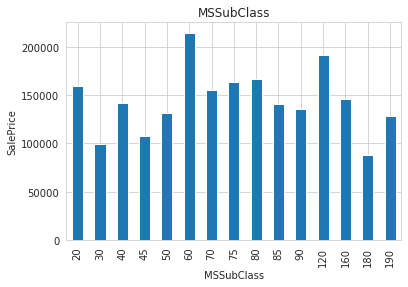

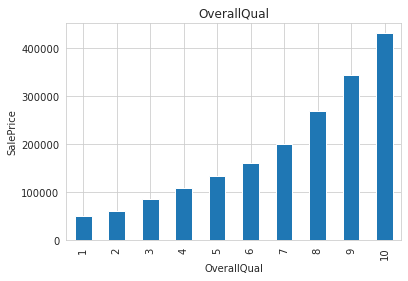

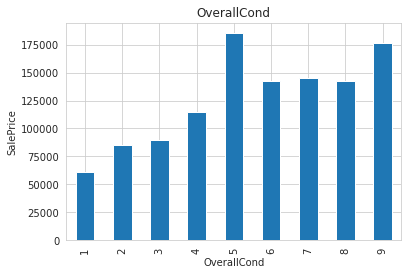

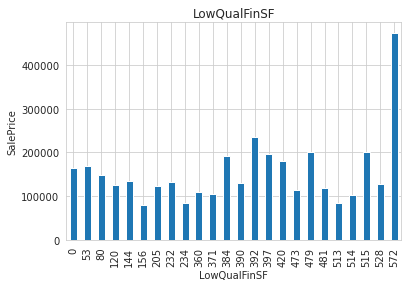

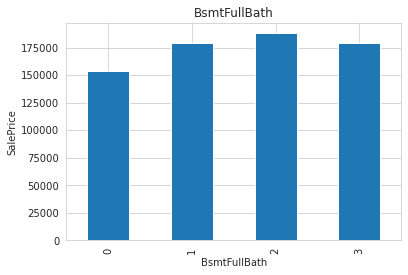

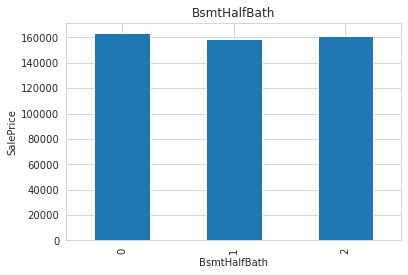

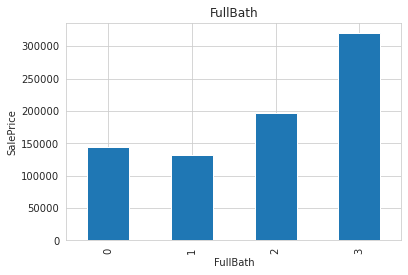

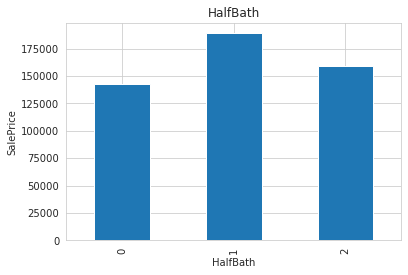

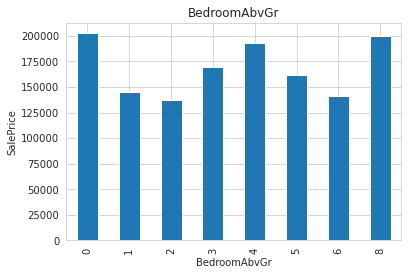

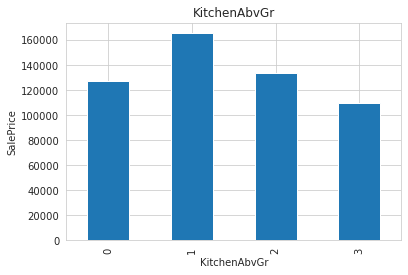

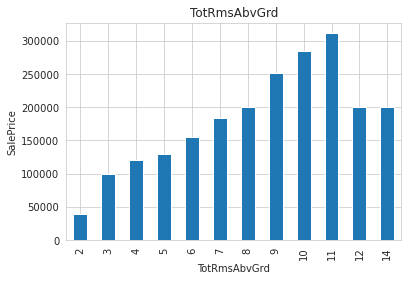

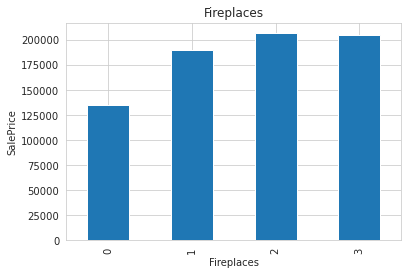

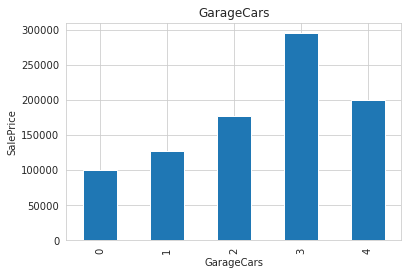

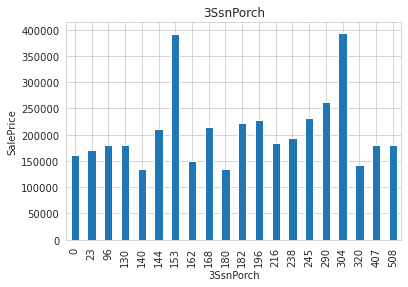

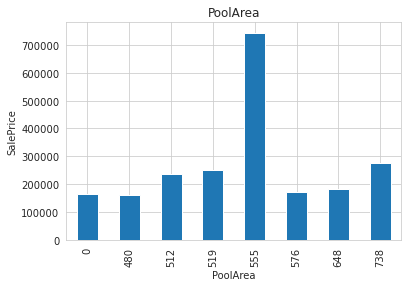

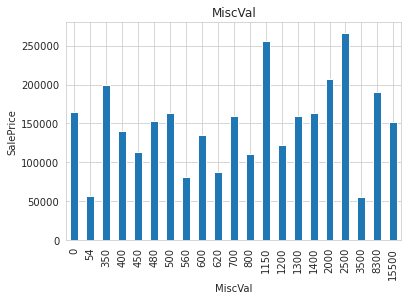

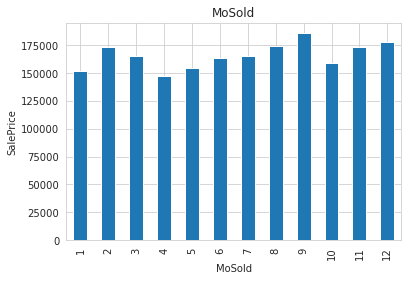

In [17]:
for feature in discrete_feature :
    
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

#### Creating the list for continuos features

In [18]:
continuos_feature = [
                    feature for feature in numeric_feature
                    if feature not in discrete_feature + year_feature + ['Id']
                    ]
print(f'Total features having continuos values :- {len(continuos_feature)}')

Total features having continuos values :- 16


#### Visualizing the relationship between continuos features and saleprice
For continuos features we plot distribution graph.

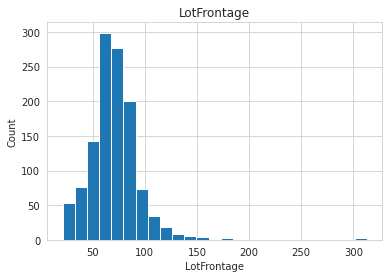

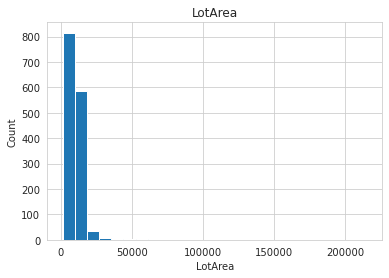

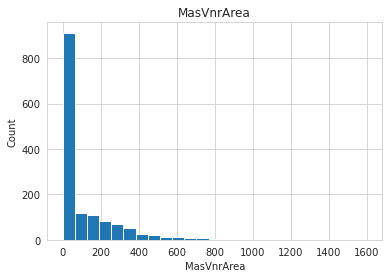

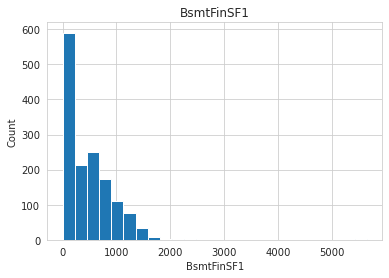

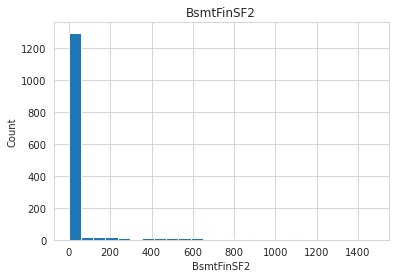

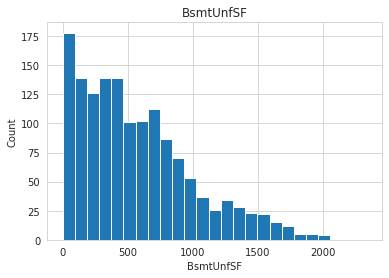

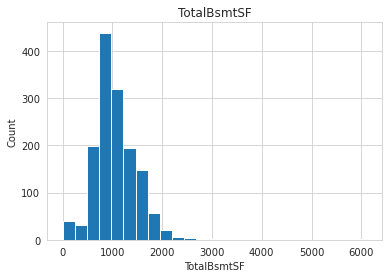

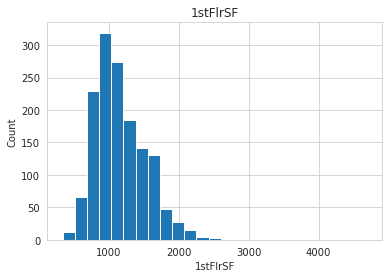

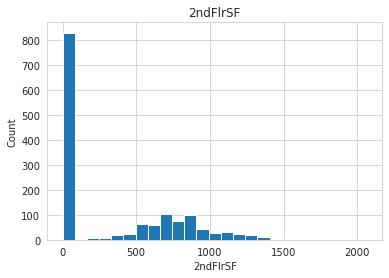

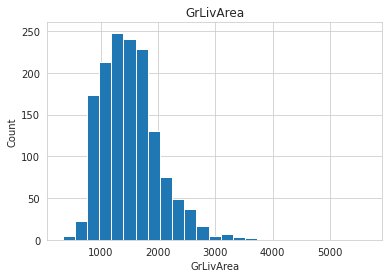

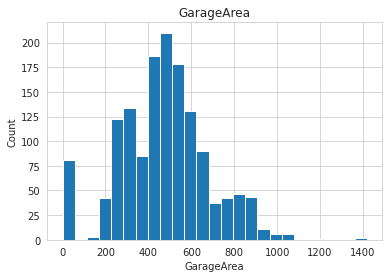

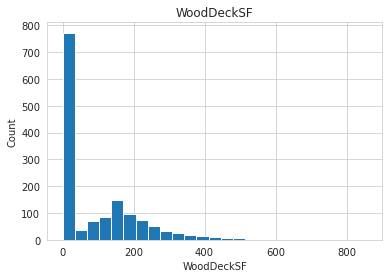

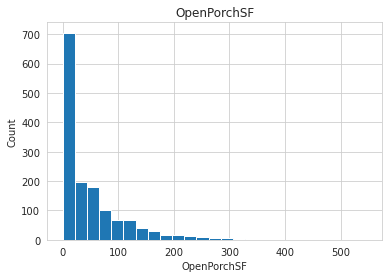

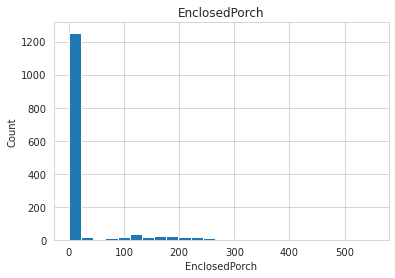

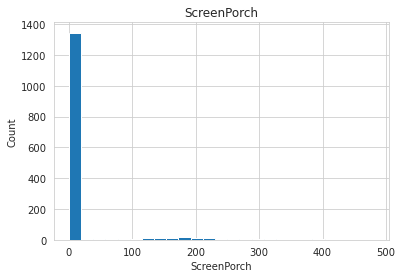

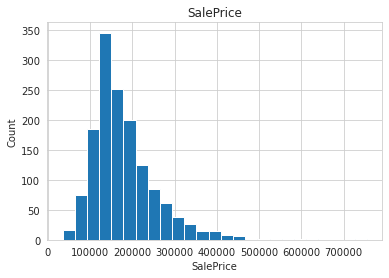

In [19]:
for feature in continuos_feature :
    
    data = dataset.copy()
    
    plt.hist(data[feature], bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Here most of the features follows the skewed distribution and while solving the regression problem we need to convert it to gaussian distribuion or standard normal distribution.

we will convert these non gaussian distribution into gaussian distribution using the log normalization.

### Using logarithmic transformation for transforming skewed distribution into gaussian distribution.

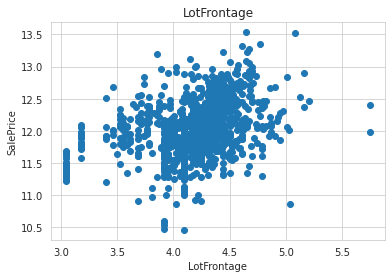

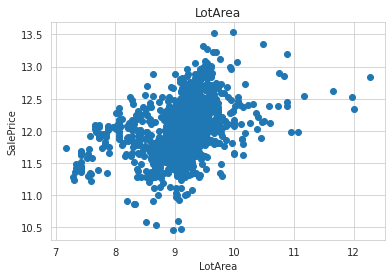

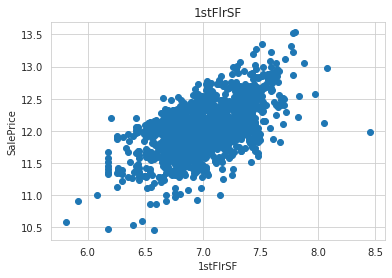

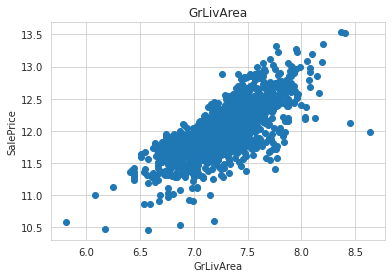

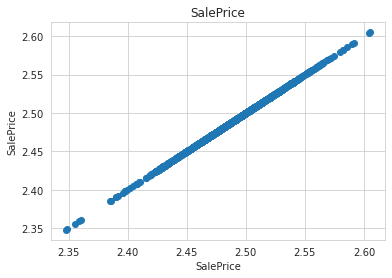

In [27]:
for feature in continuos_feature :
    
    data = dataset.copy()
    #since the value of log(0) is infinity
    if 0 in data[feature].unique() :
        pass
    else :
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

###### GrLivArea and SalePrice has a monotonic relationship, as GrLivArea is increasing then SalePrice is also increasing.

### Checking for Outliers

We can visualize the outliers using Boxplot, and this will work only with the continuos variables, not with categorical variables

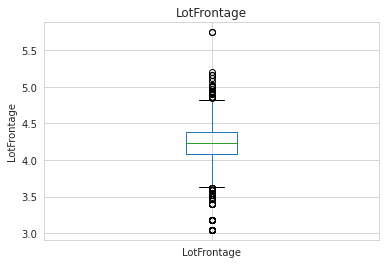

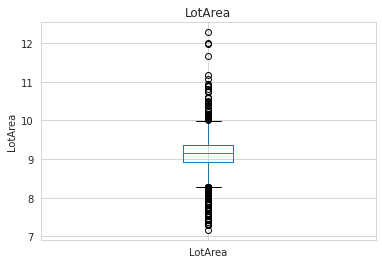

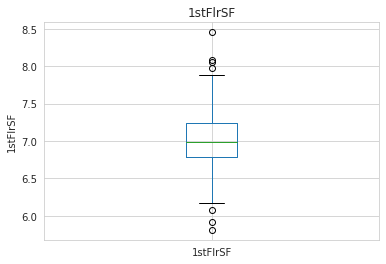

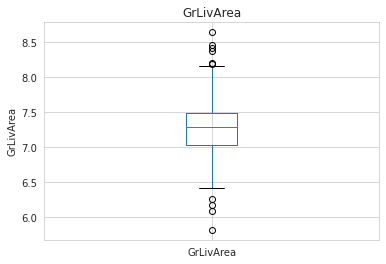

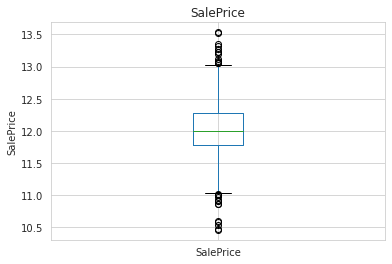

In [36]:
for feature in continuos_feature :
    
    data = dataset.copy()
    
    if 0 in data[feature].unique() :
        pass
    else :
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Small black circles are the outliers, We will remove it in feature engineering.

### Creating list for Categorical Features

In [40]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
print(f'Total categorical features are :- {len(categorical_features)}')

Total categorical features are :- 43


In [42]:
#categorical features
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [46]:
#let see how many unique categories are there in each feature
for feature in categorical_features :
    print(f'Total numbers of categories in {feature} :- {len(dataset[feature].unique())}')

Total numbers of categories in MSZoning :- 5
Total numbers of categories in Street :- 2
Total numbers of categories in Alley :- 3
Total numbers of categories in LotShape :- 4
Total numbers of categories in LandContour :- 4
Total numbers of categories in Utilities :- 2
Total numbers of categories in LotConfig :- 5
Total numbers of categories in LandSlope :- 3
Total numbers of categories in Neighborhood :- 25
Total numbers of categories in Condition1 :- 9
Total numbers of categories in Condition2 :- 8
Total numbers of categories in BldgType :- 5
Total numbers of categories in HouseStyle :- 8
Total numbers of categories in RoofStyle :- 6
Total numbers of categories in RoofMatl :- 8
Total numbers of categories in Exterior1st :- 15
Total numbers of categories in Exterior2nd :- 16
Total numbers of categories in MasVnrType :- 5
Total numbers of categories in ExterQual :- 4
Total numbers of categories in ExterCond :- 5
Total numbers of categories in Foundation :- 6
Total numbers of categories 

### Visualizing the relationship between categorical features and SalePrice

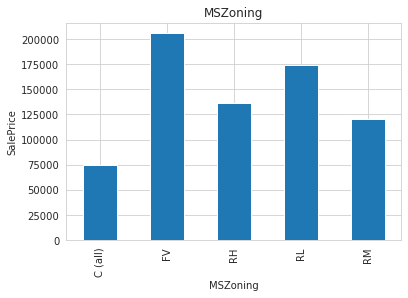

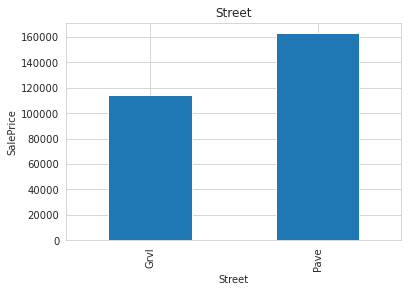

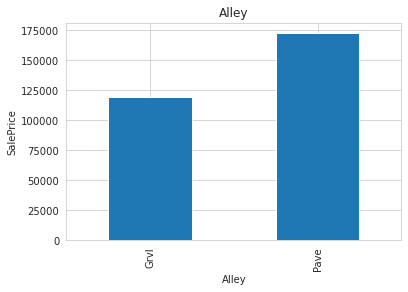

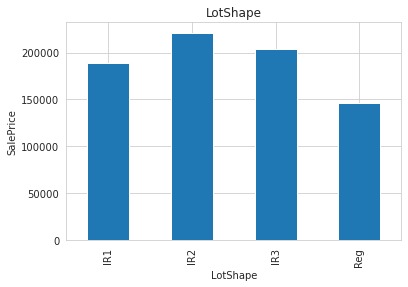

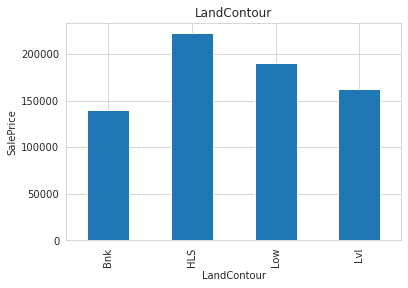

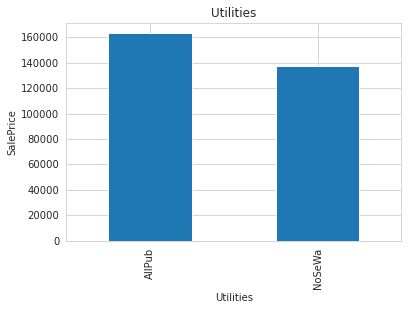

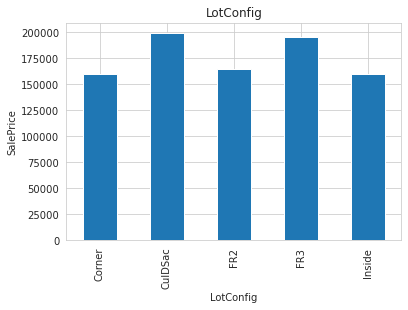

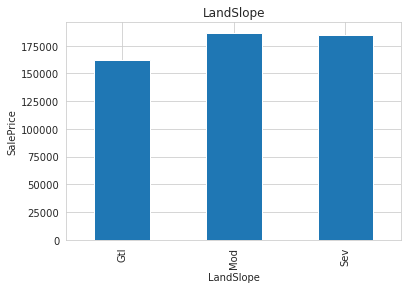

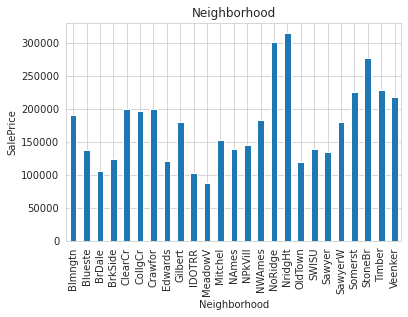

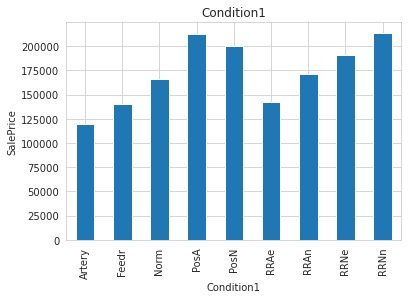

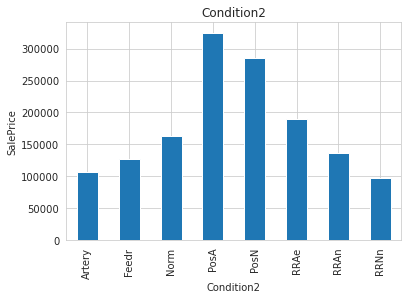

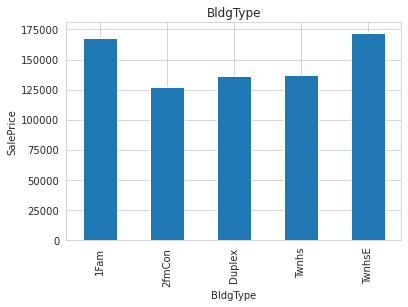

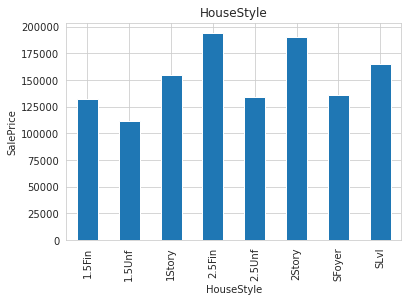

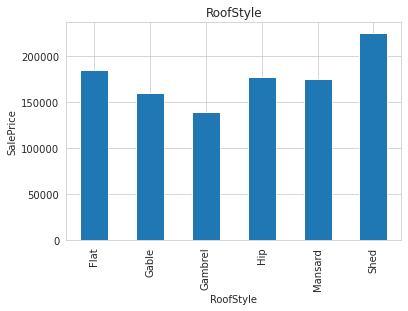

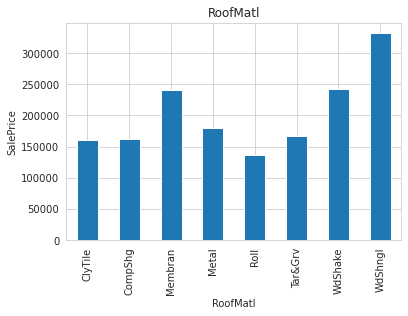

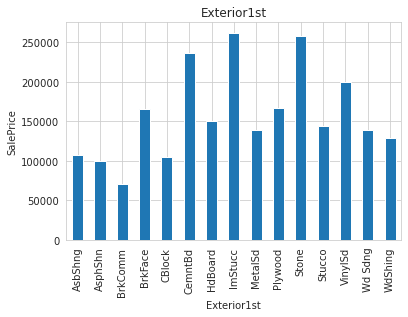

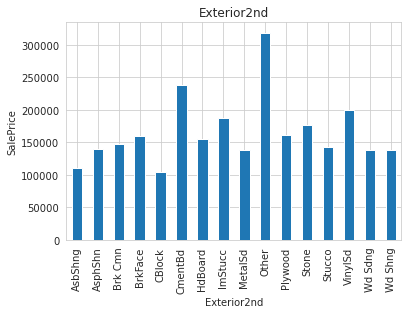

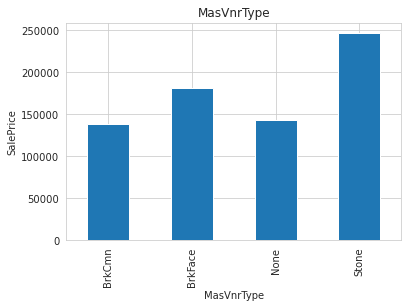

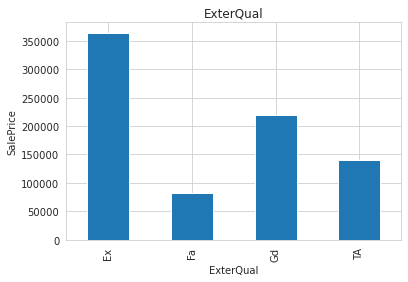

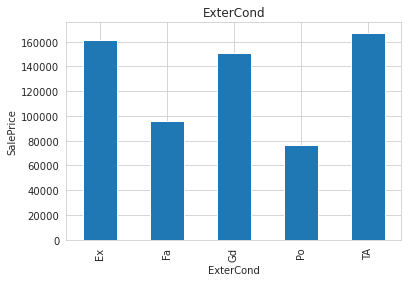

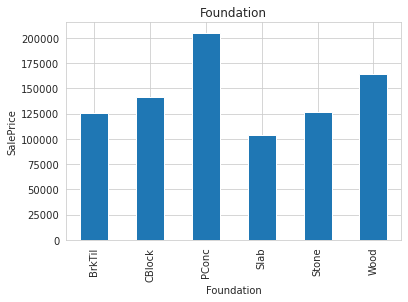

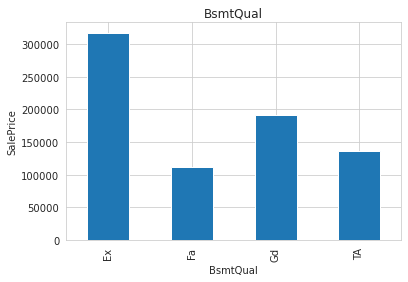

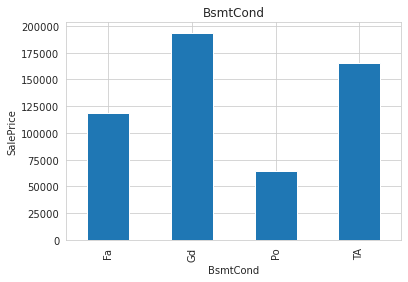

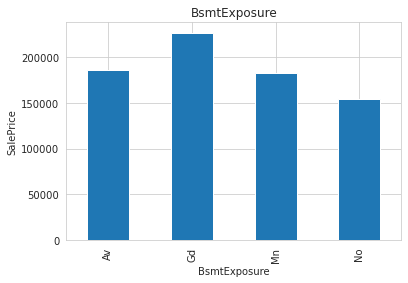

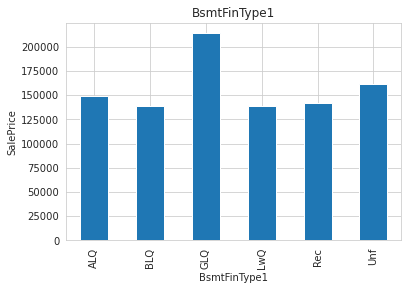

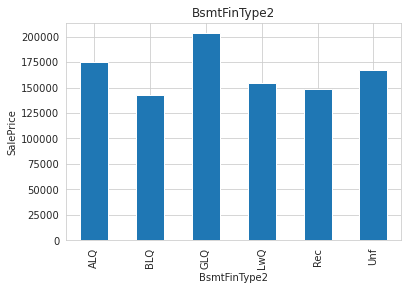

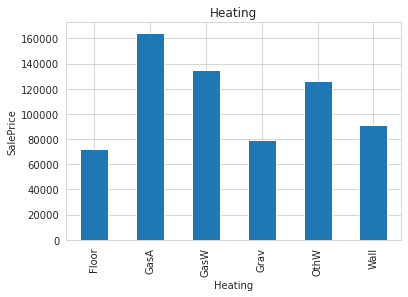

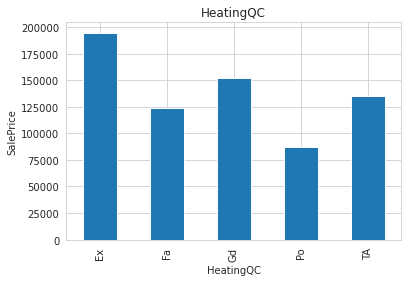

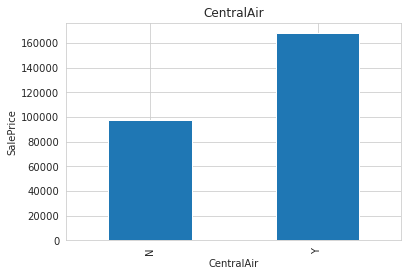

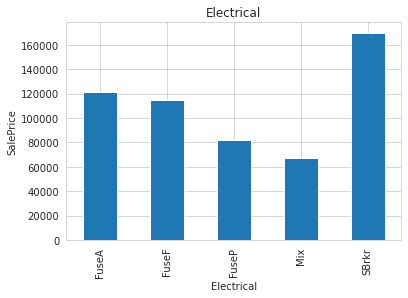

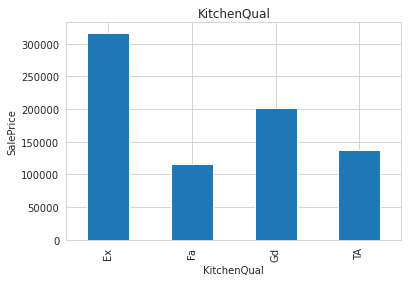

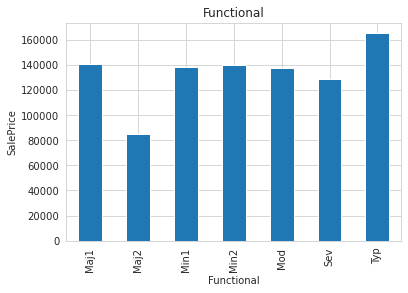

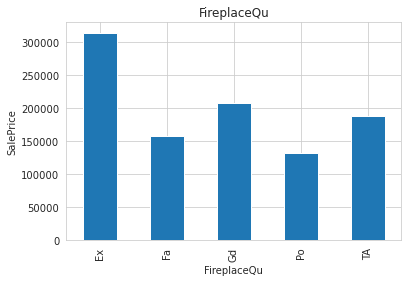

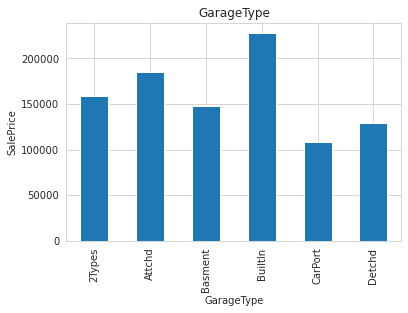

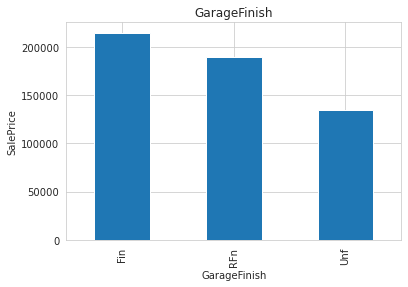

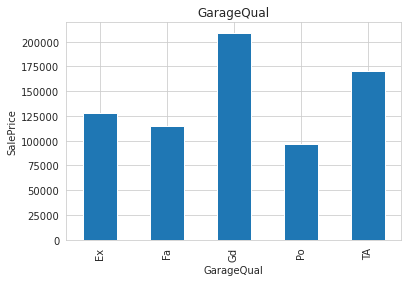

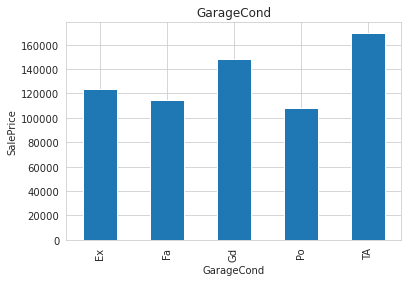

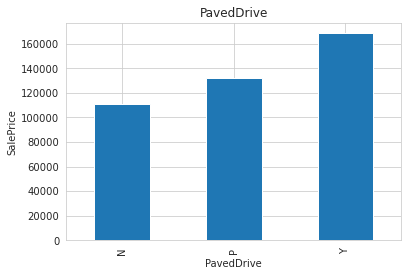

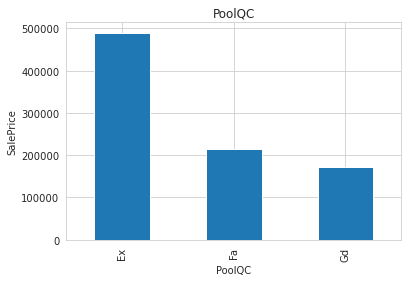

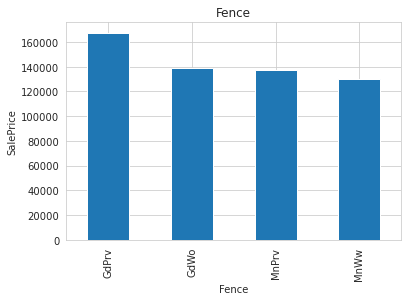

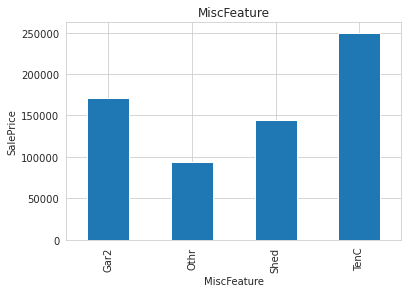

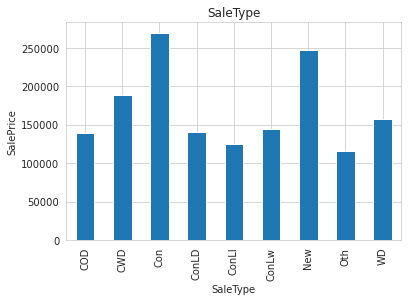

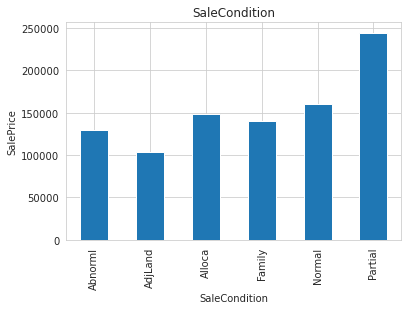

In [47]:
for feature in categorical_features :
    
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()